# Correlação e Regressão - Introdução


Na unidade anterior, vimos como calcular várias funções estatísticas para
**um conjunto de dados**.

Esta unidade será focada nas **relações entre dados**.

Por exemplo, veja este gráfico.


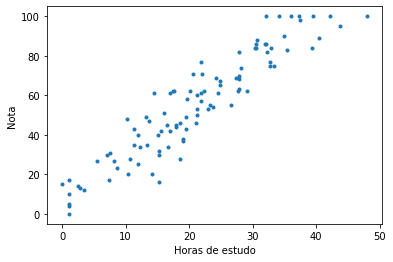


 Cada ponto representa um aluno:
 - na coordenada x, temos o número de horas estudadas pelo aluno;
 - na coordenada y, temos a nota na prova.

**OBSERVAÇÃO IMPORTANTE:**

Muitas vezes, na literatura,

- a coluna/atributo representada no eixo horizontal x é chamada de **variável independente**,  e

- a coluna/atributo representada no eixo vertical y é chamada de **variável dependente**.

> O que você consegue perceber a partir desse gráfico?

Fica bem claro que quanto mais horas estudadas, mais alta foi a nota em geral (com exceções!)

Agora veja este gráfico.

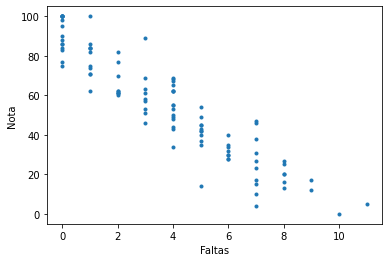

Novamente, cada ponto representa um aluno:
- na coordenada x, temos o número de faltas;
- na coordenada y, temos a nota na prova.

> E agora o que você percebe?

A situação é oposta! Quanto mais faltas, mais baixa tende a ser a nota em geral.

E neste gráfico?

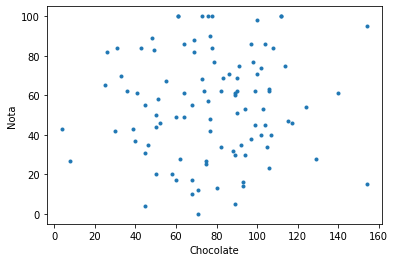

- na coordenada x, temos o quanto o aluno gosta de chocolate;
- na coordenada y, temos a nota na prova.

Dá para ver que ~~infelizmente~~ claramente que gostar de chocolate tem pouco efeito na nota.

Então, intuitivamente conseguimos entender quando dados são relacionados positivamente e negativamente.

> Será possível quantificar a relação entre dois conjuntos de dados?



<hr>

# Coeficiente de Correlação

Uma das funções estatísticas usada para isso é o **coeficiente de correlação** (de Pearson).

Vamos ver o valor do coeficiente para os exemplos acima.

Vamos começar importando algumas bibliotecas e a nossa planilha.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Aqui está a planilha:

In [9]:
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1pygGDM-F4quUo2Jl4ri-vJosb3FkRQNx&export=download")
df

,Horas,Nota,Faltas,Chocolate
0,39.58,100,1,73
1,15.26,30,6,89
2,14.10,20,8,58
3,7.52,31,7,45
4,20.21,62,2,99
...,...,...,...,...
95,16.45,45,5,104
96,39.32,84,1,43
97,21.79,61,2,41
98,27.63,62,1,74


**Para calcular o coeficiente de correlação entre Horas e Nota, usamos a função ``corr``:**

In [4]:
df['Horas'].corr(df['Nota'])

np.float64(0.9336701555689484)

**Veja que a ordem não faz diferença!**

In [5]:
df['Nota'].corr(df['Horas'])

np.float64(0.9336701555689483)

OBSERVAÇÃO:

poderia colocar os nomes de atributos entre aspas duplas também:

In [6]:
df["Nota"].corr(df["Horas"])

np.float64(0.9336701555689483)

Como você pode ver, o valor é positivo.

Quando isso acontece, isso significa que os valores tendem a crescer juntos.

Nesse caso, dizemos que os valores são **positivamente correlacionados**.

Assim, no nosso exemplo, a quantidade de horas de estudo e a nota na prova são positivamente correlacionados.

Para Faltas e Nota, temos a relação oposta:

In [7]:
df['Faltas'].corr(df['Nota'])

np.float64(-0.9262833152379718)

Como você pode ver, o coeficiente é negativo.

Quando isso acontece, isso significa que quando os valores no eixo x crescem, o valores no eixo y tendem a diminuir (e vice-versa).

Nesse caso, dizemos que os valores são **negativamente correlacionados**.

Assim, no nosso exemplo, as faltas e a nota na prova são negativamente correlacionadas.

E para Chocolate e Nota, em que há pouca relação entre os valores?

In [8]:
df['Chocolate'].corr(df['Nota'])

np.float64(0.05395381834782139)

O valor obtido é próximo de zero!

O coeficiente de correlação é sempre um valor entre -1 e 1 e pode ser interpretado da seguinte forma:
- **Quanto mais perto de 1, mais fortemente positivamente correlacionados são os dados.**
- **Quanto mais perto de -1, mais fortemente negativamente correlacionados são os dados.**
- **Quanto mais perto de 0, mais fracamente os dados são relacionados linearmente.**

Como um guia inicial, você pode se basear nos seguintes valores (independente do sinal):
- 0.00 a 0.19 - Correlação muito fraca.
- 0.20 a 0.39 - Correlação fraca.
- 0.40 a 0.69 - Correlação moderada.
- 0.70 a 0.89 - Correlação forte.
- 0.90 a 1.00 - Correlação muito forte.

Na prática, quais valores são considerados fracos ou fortes depende da aplicação.

Um ponto importante é que o coeficiente de correlação é apenas uma **medida** da relação, mas não nos explica a **natureza** dessa relação:

- Será que estudar mais horas para a prova foi o que causou a nota boa?

- Será que faltar mais foi o que causou a nota baixa?

## Exercício
Considere a planilha neste link:

https://drive.google.com/u/1/uc?id=1ASOWhw5tp-kUbZcIlkg5eCKwZNJt6MwQ&export=download

Leia a planilha e calcule o coeficiente de correlação entre
- Prova 1 e Prova 2
- Prova 1 e Trabalho
- Prova 2 e Trabalho

> Quais é o par mais fortemente correlacionado?

In [7]:
# Sua resposta
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1ASOWhw5tp-kUbZcIlkg5eCKwZNJt6MwQ&export=download")
print(df["Prova 1"].corr(df["Prova 2"]))
print(df["Prova 1"].corr(df["Trabalho"]))
print(df["Prova 2"].corr(df["Trabalho"]))

0.9111954369625983
0.39333492928005365
0.4392817985759364


<hr>

# Regressão linear



Gráficos como o seguinte são chamados de **gráficos de dispersão**:

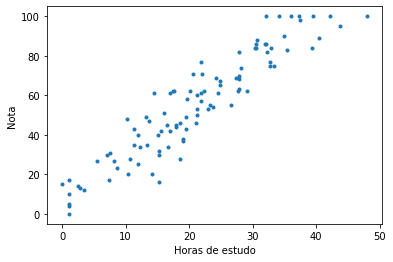

Eles são criados facilmente utilizando o função ``plot`` do ``matplotlib.pyplot``.

Para acessar a coluna Horas da planilha, fazemos assim:

In [10]:
df["Horas"]

0     39.58
1     15.26
2     14.10
3      7.52
4     20.21
      ...  
95    16.45
96    39.32
97    21.79
98    27.63
99    10.71
Name: Horas, Length: 100, dtype: float64

E similarmente para a Nota:

In [ ]:
df["Nota"]

Vamos guardar a coluna de Horas em uma variável ``x`` e a coluna de Nota em uma variável ``y``:

In [11]:
x = df["Horas"]
y = df["Nota"]

Agora podemos fazer o gráfico como temos feito até agora:

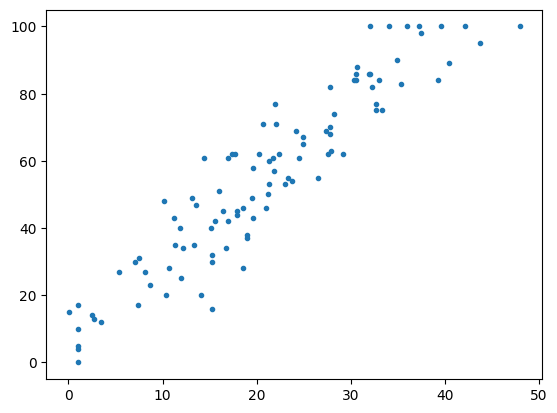

In [12]:
plt.plot(x,y,'.')

Ou até mesmo fazer direto sem as variáveis ``x`` e ``y``:

In [ ]:
plt.plot(df["Horas"],df["Nota"],'.')

OBSERVAÇÃO:

poderia colocar os nomes de atributos entre aspas simples também:


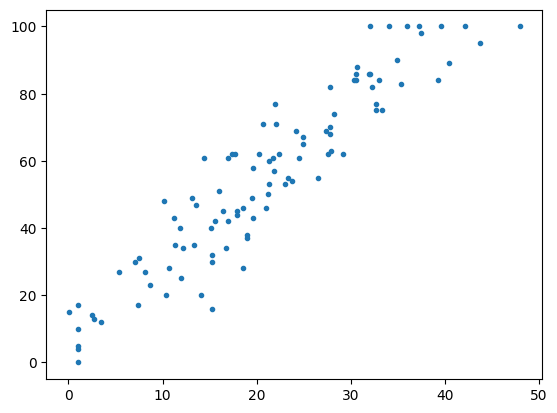

In [13]:
plt.plot(df['Horas'],df['Nota'],'.')


Cada ponto corresponde a uma entrada de dados.

No nosso exemplo, cada ponto corresponde a um aluno e
 - na coordenada x, temos o número de horas estudadas pelo aluno;
 - na coordenada y, temos a nota na prova.

Como vimos o número de horas e a nota tem coeficiente de correlação próximo a $+1$, o que indica que são fortemente positivamente correlacionados.

Suponha que você queira fazer uma predição a partir desse conjunto de dados.

> Se você estudar 15 horas, qual seria uma boa predição para a sua nota?

Uma possível abordagem é criar uma **reta de regressão linear**.

Essa é a reta que melhor se ***encaixa*** nos dados

(matematicamente, ela minimiza a soma das distância ao quadrado dos pontos para a reta).

Para relembrar: uma reta tem a fórmula
$$y = ax+b,$$
onde $a$ é a inclinação e $b$ é o intercepto (o valor de y para $x=0$)

**A biblioteca ``numpy`` calcula para nós os valores de $a$ e $b$ para a reta de regressão linear:**

In [14]:
(a, b) = np.polyfit(x=df["Horas"], y=df["Nota"], deg = 1)
print(a,b)

2.2489183222489713 7.888913148879797


O ``deg = 1`` serve para indicar que é uma reta (uma reta é um polinômio de grau $1$, portanto, estamos especificando que queremos grau $1$).

Agora que temos os valores de $a$ e $b$ é fácil de fazer uma predição para a nota com $15$ horas de estudos.

Utilizando a fórmula:
$$y=ax+b$$
e lembrando que a Nota se refere ao eixo y e as Horas ao eixo x, basta substituir o valor de x por 15:

In [15]:
a*15+b

np.float64(41.622687982614366)

Ou seja, a predição para a Nota para 15 horas de estudo é de 41.62.

## Exercício

Considere a planilha neste link:

https://drive.google.com/u/1/uc?id=1ASOWhw5tp-kUbZcIlkg5eCKwZNJt6MwQ&export=download

- Quais são os valores de $a$ e $b$ para a reta $ax+b$ de regressão linear com a Prova 1 no eixo x e a Prova 2 no eixo y?

- Qual seria a predição baseada nessa reta para a nota na Prova 2 se a nota na Prova 1 for 65?


In [ ]:
# Sua resposta


<hr>

# Gráfico

Visualmente, é muito útil ter um gráfico da reta de regressão linear junto com o gráfico de dispersão.

Como fazer um gráfico da reta?

Basta calcular os valores para os extremos do segmento da reta no gráfico.

Escolhemos 0 e 50 para os pontos no eixo x e calculamos os valores de y usando a fórmula da reta.

Em seguida basta fazer o gráfico.

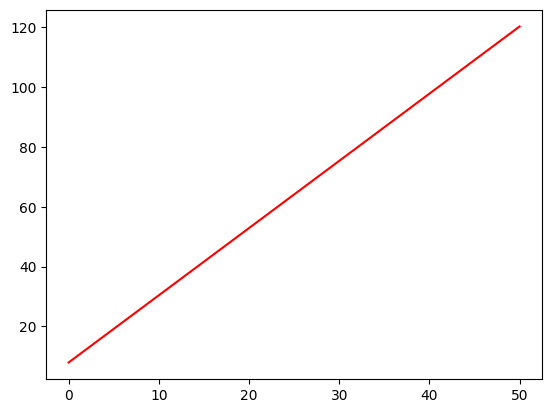

In [16]:
x0 = 0
x1 = 50
y0 = a*x0 + b
y1 = a*x1 + b
plt.plot([x0,x1],[y0,y1],'r')

Ou:

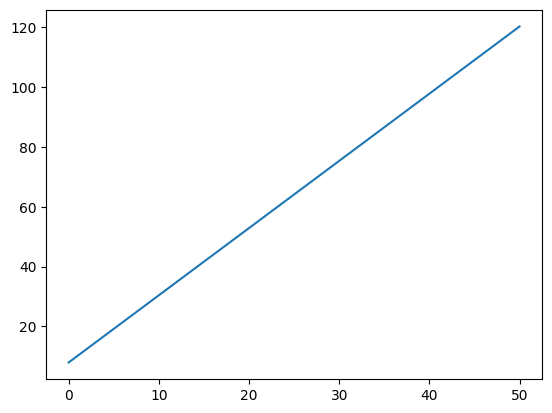

In [18]:
x = np.arange(0,51)
y = a*x+b
plt.plot(x,y)

> Para pensar: qual a diferença dessas duas maneiras?


Por fim, juntamos o gráfico de dispersão com o gráfico da reta.

Veja como a reta se encaixa bem nos nossos dados.

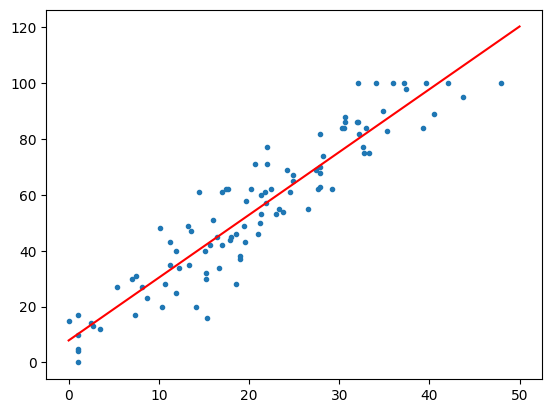

In [19]:
# relendo a planilha
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1pygGDM-F4quUo2Jl4ri-vJosb3FkRQNx&export=download")

# grafico de dispersao
plt.plot(df["Horas"],df["Nota"],'.')

# reta
x = np.arange(0,51)
y = a*x+b
plt.plot(x,y,'r')

## Exercício
Considere a planilha no link

https://drive.google.com/u/1/uc?id=1ASOWhw5tp-kUbZcIlkg5eCKwZNJt6MwQ&export=download

Faça o gráfico de dispersão com reta de regressão linear com:

- Trabalho no eixo x
- Prova 2 no eixo y


In [ ]:
# Sua resposta


<hr>

# Coeficiente de determinação

O **coeficiente de determinação** $R^2$ é um valor utilizado para indicar o quão bem a reta de regressão linear se encaixa aos dados disponibilizados.

Para regressão linear, $R^2$ é simplesmente o **quadrado do coeficiente de correlação**.

Uma de suas interpretações para o significado de $R^2$ é a porcentagem de variabilidade da variável no eixo y que é explicada pela variável no eixo x.

Para o nosso exemplo de Horas e Notas:

In [3]:
# relendo a planilha
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1pygGDM-F4quUo2Jl4ri-vJosb3FkRQNx&export=download")

ccor = df['Horas'].corr(df['Nota'])
cdet = ccor**2
cdet

np.float64(0.8717399594001443)

Esse valor alto era de se esperar, pois a reta se encaixou muito bem aos dados.

## Exercício

Considere a planilha no link

https://drive.google.com/u/1/uc?id=1ASOWhw5tp-kUbZcIlkg5eCKwZNJt6MwQ&export=download

Calcule o coeficiente de determinação entre Trabalho e Prova 1.

In [ ]:
# Sua resposta


<hr>

# Regressão polinomial

O coeficiente de correlação só considera uma relação linear:
- um valor cresce e outro cresce **OU**
- um valor cresce e o outro decresce

Este tipo de relação é muito simples!

Veja este gráfico:

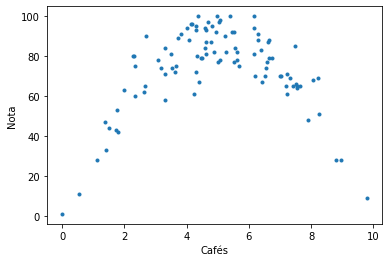

Cada ponto corresponde a um aluno e
 - na coordenada x, temos o número de cafés tomados antes da prova;
 - na coordenada y, temos a nota na prova.

> Como você descreveria a relação entre cafés e nota?

Dá para perceber que até um certo ponto a nota parece crescer junto com a quantidade de cafés e, mais ou menos a partir de 5 cafés, essa relação se inverte.

> Qual será o coeficiente de correlação entre eles?

In [4]:
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1TUDYCy8bMLQ--0jRAMXRNsg2hhnQcKGX&export=download")
df['Cafes'].corr(df['Nota'])

np.float64(0.11901614184897776)

O coeficiente de correlação é muito próximo de zero!

Isso é esperado, pois nenhuma reta descreveria bem a relação entre café e nota.

Veja como a reta de regressão linear fica ruim:

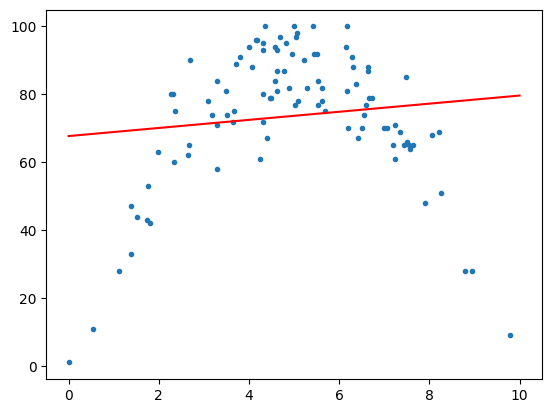

In [5]:
(a, b) = np.polyfit(x=df["Cafes"], y=df["Nota"], deg = 1)
plt.plot(df["Cafes"],df["Nota"],'.')
x = np.arange(0,11)
y = a*x+b
plt.plot(x,y,'r')

Ou seja, os dados estão relacionados, mas a relação não é tão simples.

No nosso exemplo, ao invés de usar uma reta de regressão linear, podemos procurar qual é o polinômio de grau 2 (ou seja, qual parábola) melhor se encaixa nos dados.

Para isso, basta especificarmos o grau para ser $2$.

A fórmula de uma parábola é:
$$ax^2 + bx + c$$

Semelhante ao caso de regressão linear, podemos usar a fórmula para fazer predições.

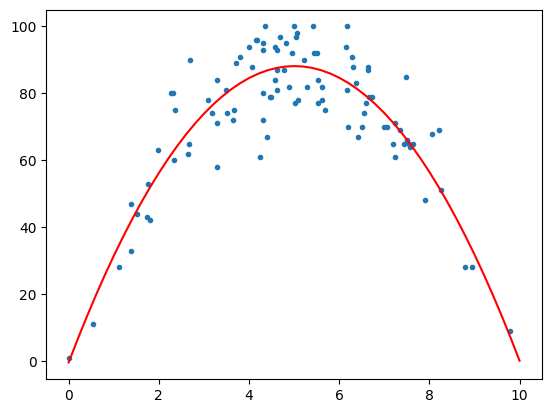

In [6]:
(a, b, c) = np.polyfit(x=df["Cafes"], y=df["Nota"], deg = 2)

# dispersao
plt.plot(df["Cafes"],df["Nota"],'.')

# parabola
x = np.arange(0,10.1,0.2)
y = a*x**2+b*x+c
plt.plot(x,y,'r')

É necessário ter precaução  ao utilizar a regressão polinomial, porque se permitirmos um grau muito alto corremos o risco de **overfitting**.

De maneira informal, **overfitting** ocorre quando procuramos uma solução que se encaixa muitíssimo bem aos dados disponíveis, mas não leva em conta que os dados podem ter imprecisões e que muitas vezes trabalhamos apenas com uma amostra dos nossos dados.

Um dos principais problemas de uma solução com overfitting é que, em geral, perdemos poder de predição.

Aqui está um exemplo em que temos 10 pontos.

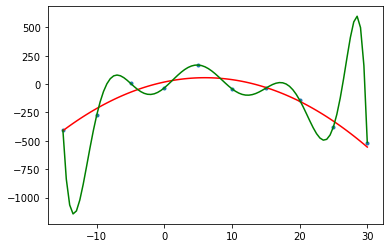

*A* curva em vermelho é um polinômio de grau 2.

A curva em verde é um polinômio de grau 10.

Veja como a curva verde se encaixa perfeitamente nos pontos, mas ao mesmo tempo tem um comportamento muito "instável".

## Exercício:

Considere a planilha no link

https://drive.google.com/u/1/uc?id=1ZNKsK1dGsDiGDU3841yA-MdK1H3QSdxc&export=download

- Calcule o polinômio de grau 3 utilizando o método de regressão polinomial com Exame 1 no eixo x e Exame 2 no eixo y.

- Faça o gráfico de dispersão e do polinômio juntos.

> Baseado no gráfico, o polinômio descreve bem os dados?

In [ ]:
# Sua resposta


<hr>

# Extra: Coeficiente de determinação para regressão polinomial

Para polinômios de grau $\geq 2$, não podemos calcular o coeficiente de determinação apenas calculando o quadrado do coeficiente de correlação.

Precisamos realizar vários pequenos passos.

Primeiro, vamos recalcular o polinômio de grau $2$ para o exemplo Café vs Nota:

In [7]:
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1TUDYCy8bMLQ--0jRAMXRNsg2hhnQcKGX&export=download")
cafes = df["Cafes"]
notas = df["Nota"]
(a, b, c) = np.polyfit(x=cafes, y=notas, deg = 2)

Em seguida, calculamos quais seriam os valores previstos pelo polinômio para cada um dos pontos:

In [8]:
predicao = a*cafes**2 + b*cafes + c
predicao

0     51.116644
1     87.627940
2     74.129740
3     81.108648
4     87.896468
        ...    
95    44.928247
96    87.512716
97    82.208761
98    81.836266
99    87.600194
Name: Cafes, Length: 100, dtype: float64

Note que esses valores nem sempre coincidem com as notas, mas a maioria está próxima:

In [9]:
notas

0     53
1     93
2     70
3     67
4     82
      ..
95    44
96    94
97    89
98    75
99    81
Name: Nota, Length: 100, dtype: int64

Calculamos os quadrados das diferenças entre as notas e a predição:

In [10]:
dif = (notas-predicao)**2
dif

0       3.547029
1      28.859026
2      17.054749
3     199.053947
4      34.768332
         ...    
95      0.861643
96     42.084859
97     46.120927
98     46.734528
99     43.562564
Length: 100, dtype: float64

Calculamos os quadrados das diferenças entre as notas e a **média das notas**:

In [11]:
media = notas.mean()
dif_media = (notas-media)**2
dif_media

0     425.5969
1     375.1969
2      13.1769
3      43.9569
4      70.0569
        ...   
95    877.9369
96    414.9369
97    236.2369
98      1.8769
99     54.3169
Name: Nota, Length: 100, dtype: float64

Finalmente, o coeficiente de determinação é calculado pela fórmula:

$$1-\frac{\text{soma(dif)}}{\text{soma(dif_media)}}$$

In [12]:
cdet = 1 - dif.sum() / dif_media.sum()
cdet

np.float64(0.8000186741313455)

Veja como este valor é muito diferente do coeficiente de correlação ao quadrado!

In [13]:
df["Cafes"].corr(df["Nota"])**2

np.float64(0.014164842020615994)

Veja como é interessante e conveniente que no caso da regressão linear basta calcular o quadrado do coeficiente de correlação.

Veja o que acontece se repetirmos o mesmo processo para o caso Horas vs Nota em que a regressão era **linear**:

In [14]:
# relendo a planilha
df = pd.read_csv("https://drive.google.com/u/1/uc?id=1pygGDM-F4quUo2Jl4ri-vJosb3FkRQNx&export=download")

# calculando correlacao
ccor = df['Horas'].corr(df['Nota'])
cdet = ccor**2
print(cdet)

# calculando reta
horas = df["Horas"]
notas = df["Nota"]
(a, b) = np.polyfit(x=horas, y=notas, deg = 1)

# calculando coeficiente de determinacao
predicao = a*horas + b
dif  = (notas-predicao)**2
media = notas.mean()
dif_media = (notas-media)**2

cdet2 = 1 - dif.sum() / dif_media.sum()
print(cdet2)


0.8717399594001443
0.8717399594001441


Os valores são praticamente iguais!

**Observação**: A diferença dos valores acima na última casa acontece porque, quando calculamos dois valores seguindo passos diferentes, o computador pode fazer arredondamentos diferentes durante os processos.

## Exercício

Considere a planilha no link

https://drive.google.com/u/1/uc?id=1ZNKsK1dGsDiGDU3841yA-MdK1H3QSdxc&export=download

Calcule o polinômio de grau 3 utilizando o método de regressão polinomial com Exame 1 no eixo x e  Exame 2 no eixo y.

Calcule o coeficiente de determinação.

In [ ]:
# Sua resposta
